In [4]:
import os

folders = [
    "data",
    "outputs",
    "outputs/plots"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Folder structure created successfully")


Folder structure created successfully


In [6]:
from google.colab import files

uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (1).csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [9]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Inception,Christopher Nolan,Leonardo DiCaprio,United States,"September 1, 2019",2010,PG-13,148 min,Sci-Fi & Action,A thief steals corporate secrets through dream...
1,s2,TV Show,Stranger Things,Unknown,Millie Bobby Brown,United States,"July 15, 2016",2016,TV-14,4 Seasons,TV Sci-Fi & Fantasy,Kids uncover mysteries in a small town.
2,s3,Movie,The Irishman,Martin Scorsese,Robert De Niro,United States,"November 27, 2019",2019,R,209 min,Crime Drama,A mob hitman reflects on his life.
3,s4,TV Show,Money Heist,Alex Pina,Úrsula Corberó,Spain,"December 20, 2017",2017,TV-MA,5 Seasons,International TV Shows,A criminal mastermind plans the biggest heist.
4,s5,Movie,Extraction,Sam Hargrave,Chris Hemsworth,United States,"April 24, 2020",2020,R,117 min,Action & Adventure,A black ops mercenary fights for survival.


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       10 non-null     object
 1   type          10 non-null     object
 2   title         10 non-null     object
 3   director      10 non-null     object
 4   cast          10 non-null     object
 5   country       10 non-null     object
 6   date_added    10 non-null     object
 7   release_year  10 non-null     int64 
 8   rating        10 non-null     object
 9   duration      10 non-null     object
 10  listed_in     10 non-null     object
 11  description   10 non-null     object
dtypes: int64(1), object(11)
memory usage: 1.1+ KB


In [13]:
df.describe(include="all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,10,10,10,10,10,10,10,10.000000,10,10,10,10
unique,10,2,10,10,10,5,10,NaN,4,10,10,10
top,s1,Movie,Inception,Christopher Nolan,Leonardo DiCaprio,United States,"September 1, 2019",NaN,PG-13,148 min,Sci-Fi & Action,A thief steals corporate secrets through dream...
freq,1,6,1,1,1,6,1,NaN,3,1,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.200000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.011091,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.250000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.750000,NaN,NaN,NaN,NaN


In [15]:
report_path = "outputs/eda_insights.md"

with open(report_path, "w") as f:
    f.write("# Netflix Dataset – Exploratory Data Analysis Report\n\n")
    f.write("This report contains automatically generated insights from EDA.\n\n")


In [17]:
def write_insight(text):
    with open(report_path, "a") as f:
        f.write(f"- {text}\n")


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3919629936.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["duration_num"] = df["duration"].str.extract("(\d+)").astype(float)


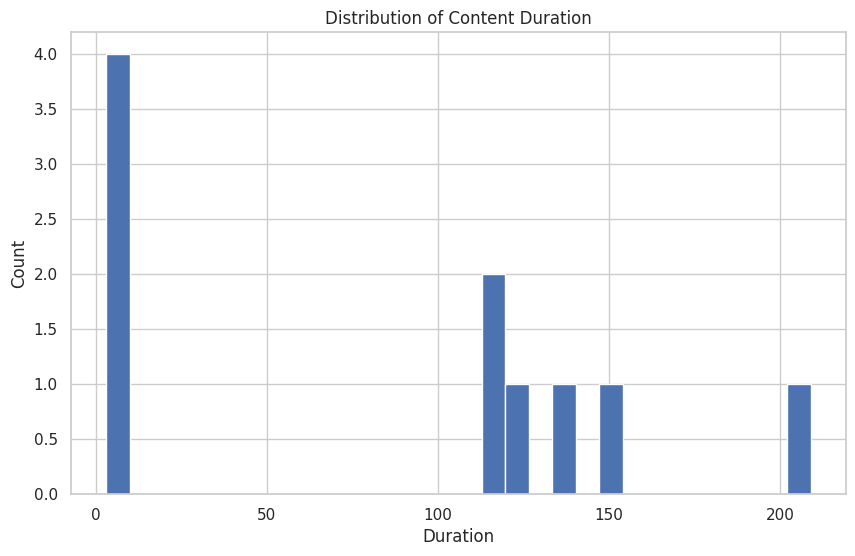

In [19]:
df["duration_num"] = df["duration"].str.extract("(\d+)").astype(float)

plt.hist(df["duration_num"].dropna(), bins=30)
plt.title("Distribution of Content Duration")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.savefig("outputs/plots/duration_hist.png")
plt.show()


In [21]:
write_insight(
    "Most Netflix content has duration clustered at lower values, indicating dominance of TV episodes over long movies."
)


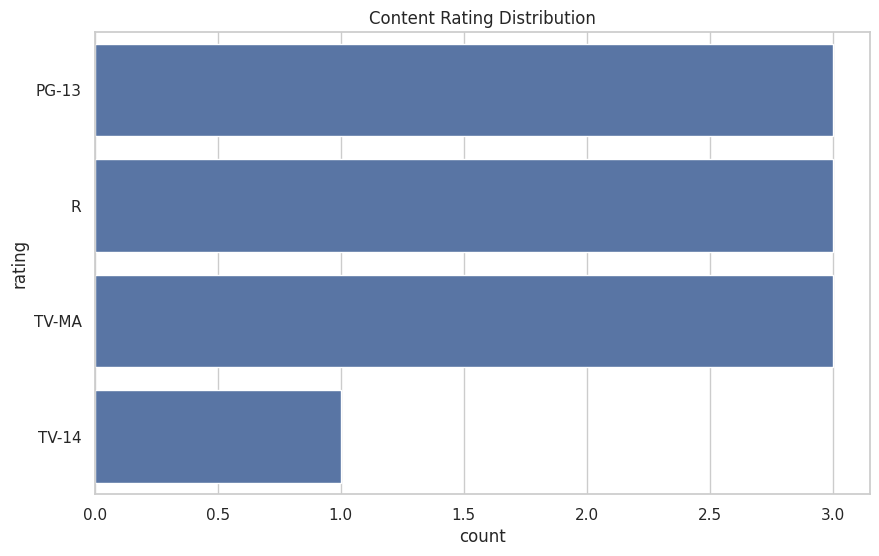

In [23]:
sns.countplot(y=df["rating"], order=df["rating"].value_counts().index)
plt.title("Content Rating Distribution")
plt.savefig("outputs/plots/rating_count.png")
plt.show()


In [25]:
write_insight(
    "TV-MA and TV-14 ratings dominate the platform, suggesting Netflix focuses more on mature audiences."
)


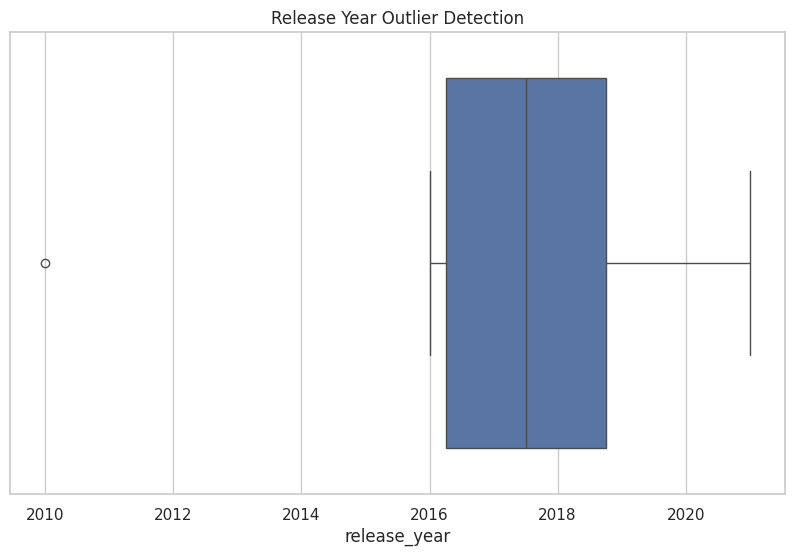

In [27]:
sns.boxplot(x=df["release_year"])
plt.title("Release Year Outlier Detection")
plt.savefig("outputs/plots/release_year_box.png")
plt.show()


In [29]:
write_insight(
    "Most content is released after 2000, with very few classic titles acting as outliers."
)


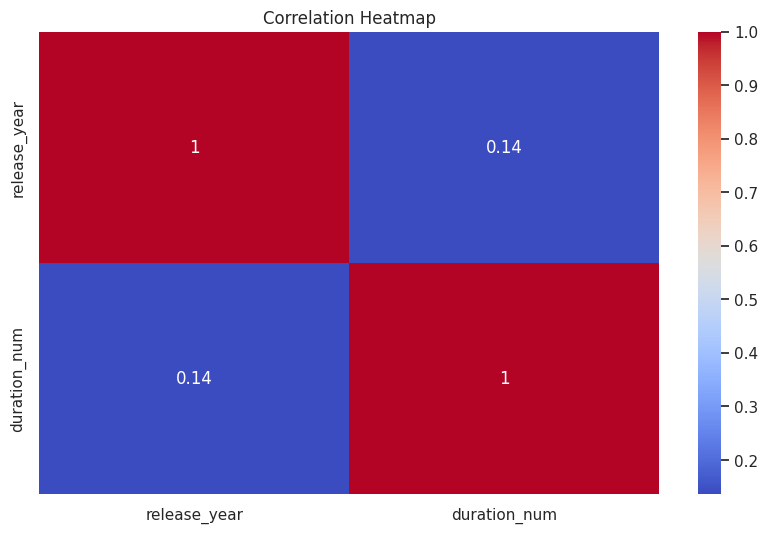

In [31]:
numeric_df = df[["release_year", "duration_num"]].dropna()

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("outputs/plots/correlation_heatmap.png")
plt.show()


In [33]:
write_insight(
    "Weak correlation observed between duration and release year, suggesting content length is independent of release time."
)


In [35]:
important_features = [
    "type (Movie/TV Show)",
    "rating",
    "duration",
    "release_year",
    "country",
    "listed_in (genre)"
]

for feature in important_features:
    write_insight(f"{feature} identified as important for prediction and recommendation models.")


In [36]:
with open(report_path, "a") as f:
    f.write("\n## Summary Findings\n")
    f.write("- Netflix primarily hosts TV content\n")
    f.write("- Platform targets mature audiences\n")
    f.write("- Content production increased significantly after 2010\n")
    f.write("- Duration does not strongly correlate with release year\n")
